# RBM - Image Generation
--------------------------------------

In [27]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [28]:
from source.utils import load_alpha_digits
import matplotlib.pyplot as plt
import numpy as np
from source.RBM import RBM
from source.DNN import DNN

# Alpha Digits

In [29]:
def alpha(up_to, letter=True):
    data = load_alpha_digits()
    digits = []
    for digit_idx in range(up_to+1):
        if digit_idx==1:
            pass
        else:
            if letter:
                digit = [data["dat"][10+digit_idx][i].flatten() for i in range(data["dat"][10+digit_idx].shape[0])]
            else:
                digit = [data["dat"][digit_idx][i].flatten() for i in range(data["dat"][digit_idx].shape[0])]
            digit = np.array(digit)
            digits.append(digit)

    digits = np.concatenate(digits)
    return digits

def gen_and_plot(rbm: RBM, reshape):
    fig, axs = plt.subplots(1, 5)
    fig.set_size_inches(17, 3)
    gen = rbm.generate_image(5, 100, reshape=reshape)
    for i in range(5):
        axs[i].imshow(gen[i], cmap='gray')
    plt.show()

## Letters Only

0


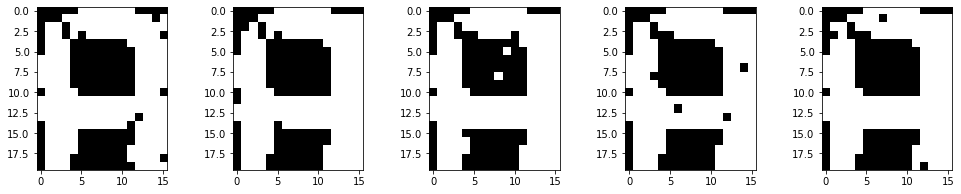

1


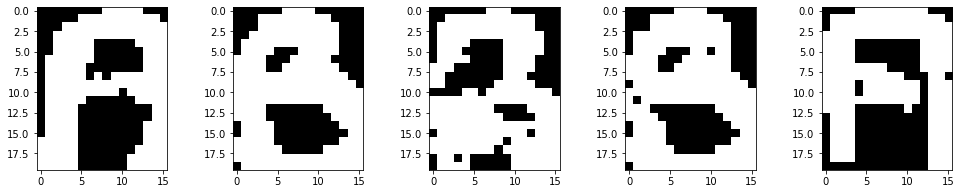

2


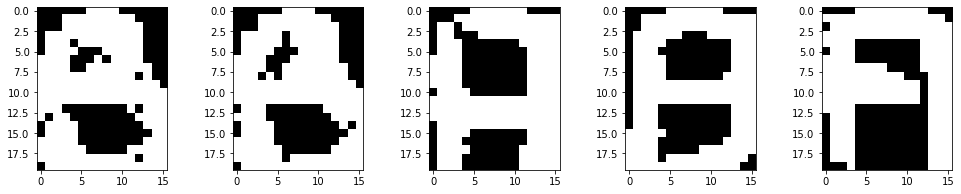

3


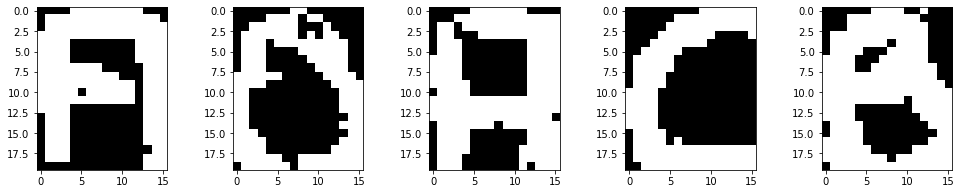

4


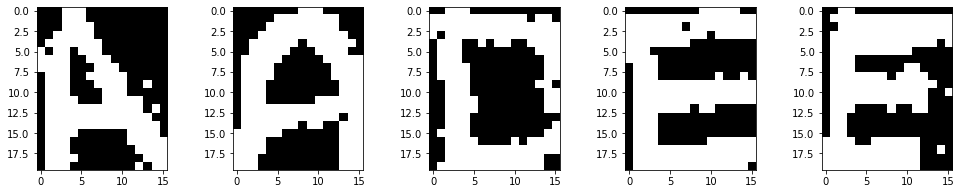

5


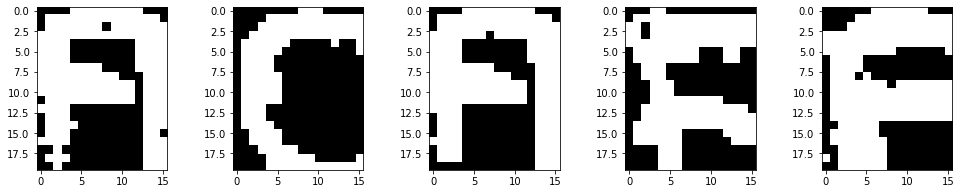

6


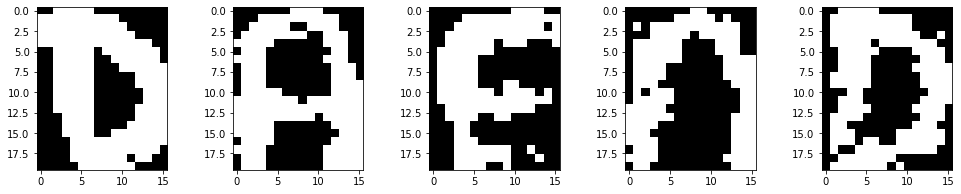

7


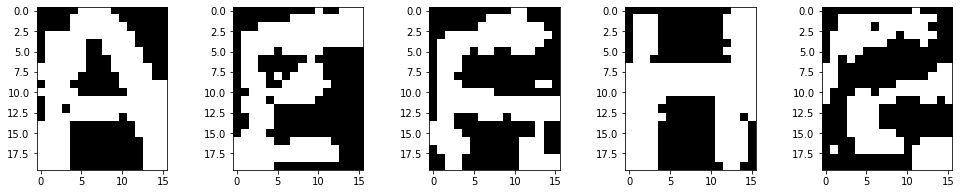

8


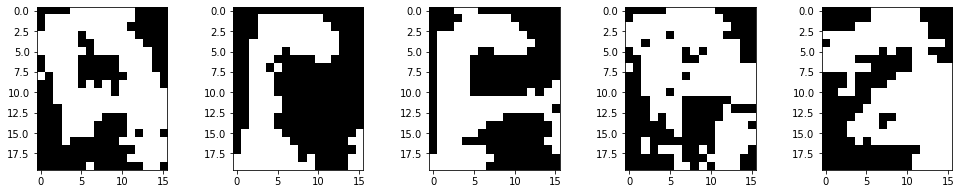

9


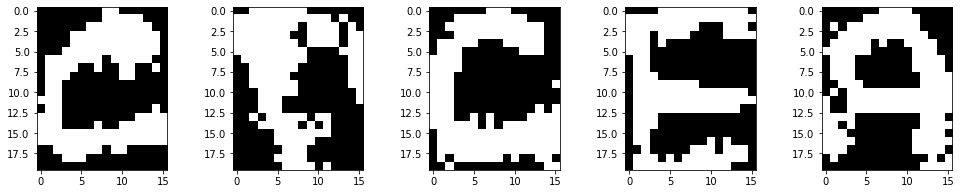

10


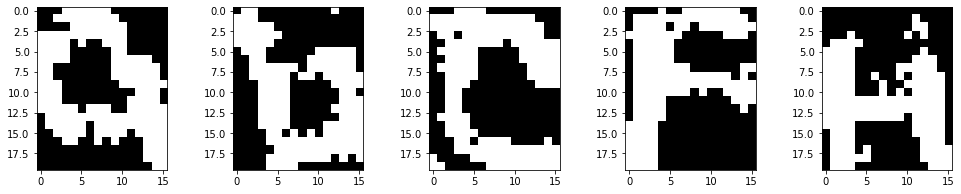

11


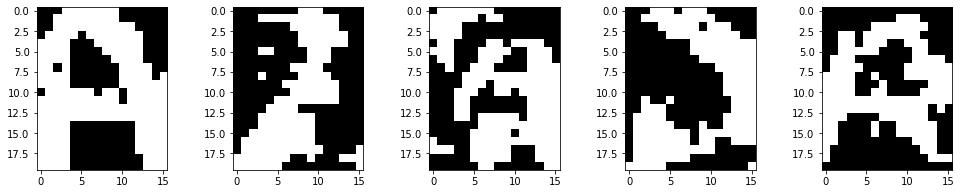

12


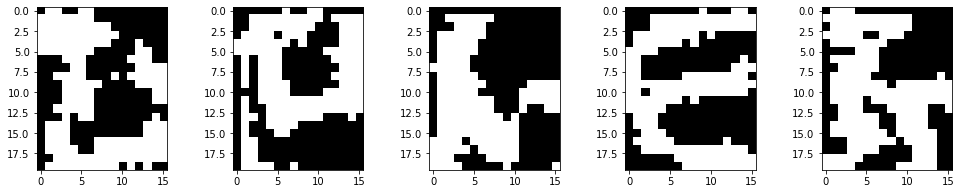

13


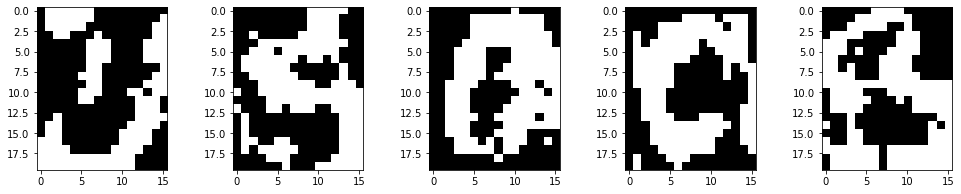

14


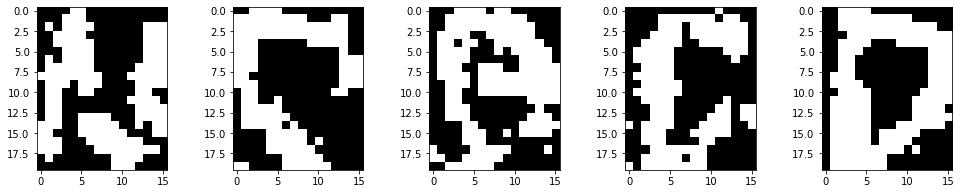

15


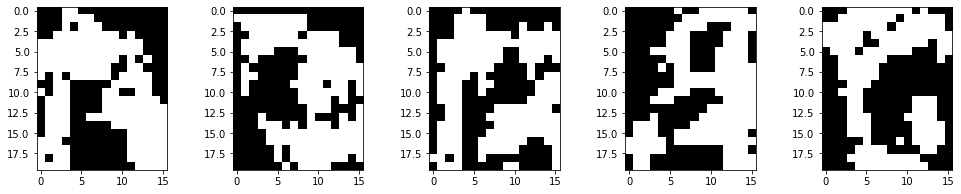

16


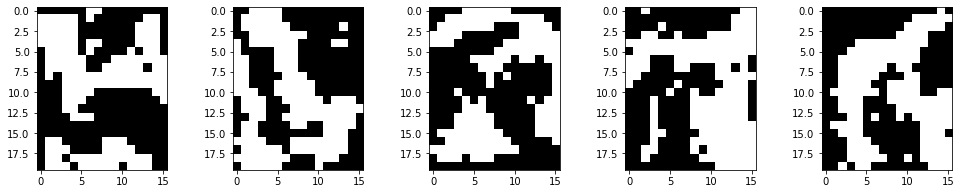

17


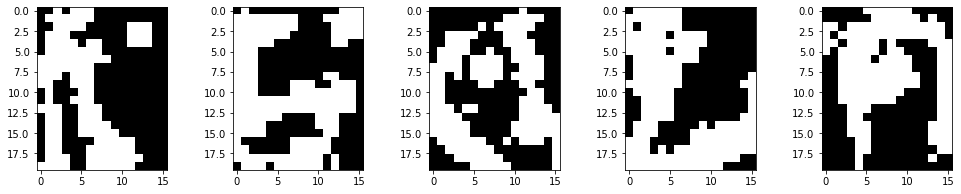

18


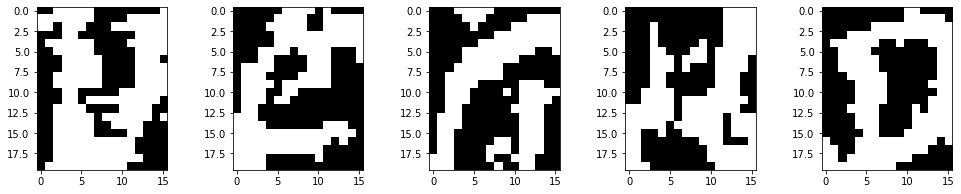

19


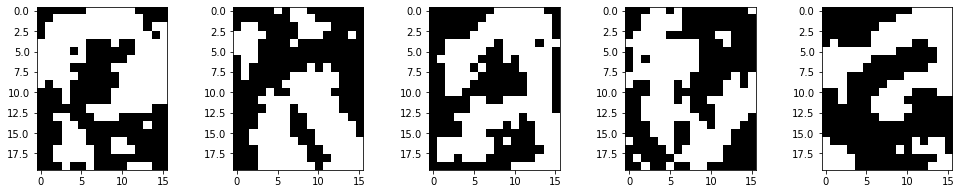

20


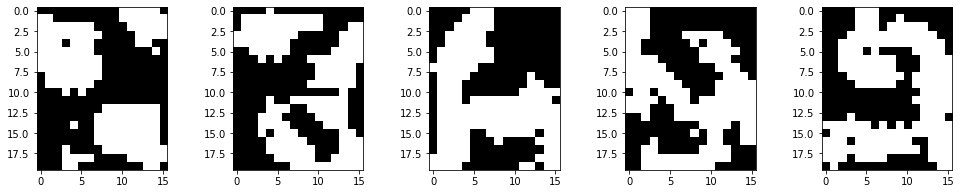

21


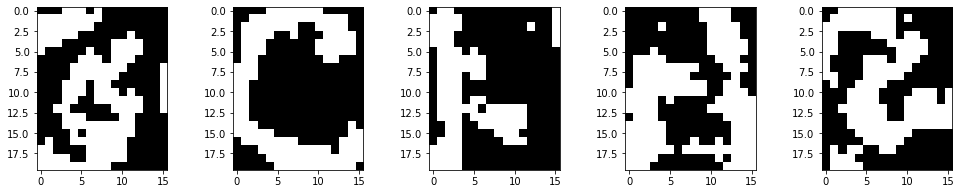

22


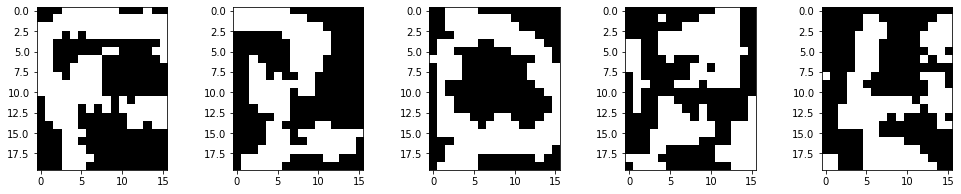

23


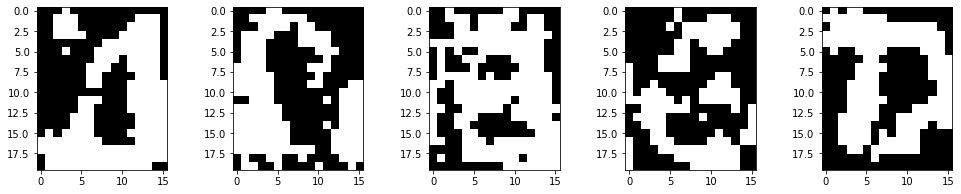

24


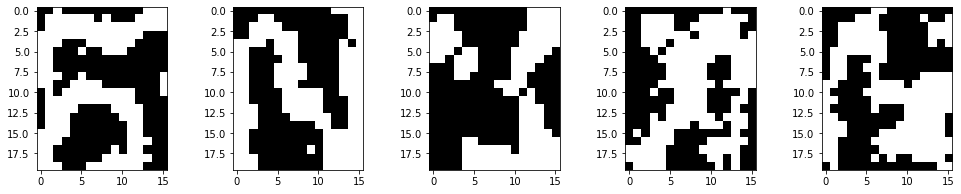

25


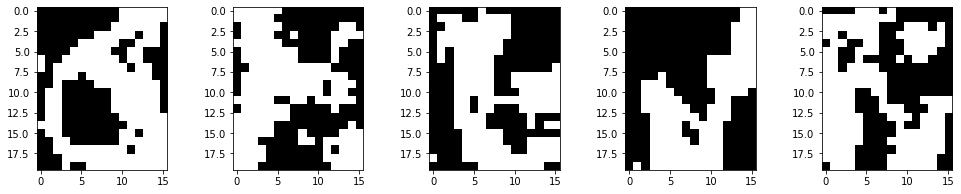

In [15]:
for letter in range(26):
    reduced_dataset = alpha(up_to=letter)
    print(letter)
    rbm = RBM(reduced_dataset.shape[1], 200)
    errors = rbm.train(reduced_dataset, 32, num_epochs=1000, lr=0.1, verbose=False)
    gen_and_plot(rbm, (20, 16))

## Digits Only

Layer pretrain epoch : 29:   2%|▉                                                   | 18/1000 [00:00<00:05, 173.54it/s]

0


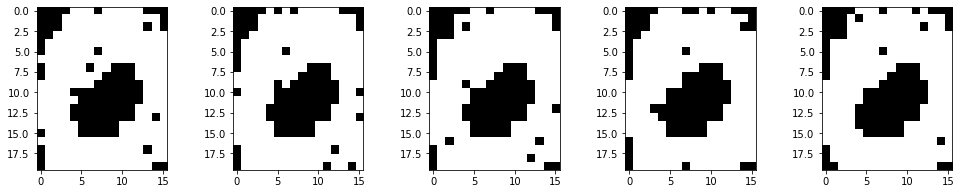

Layer pretrain epoch : 30:   2%|▉                                                   | 19/1000 [00:00<00:05, 179.72it/s]

1


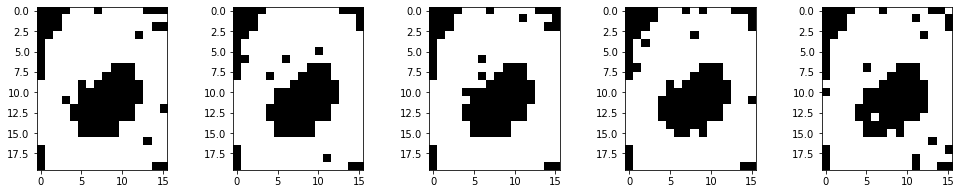

Layer pretrain epoch : 18:   1%|▌                                                   | 11/1000 [00:00<00:09, 103.08it/s]

2


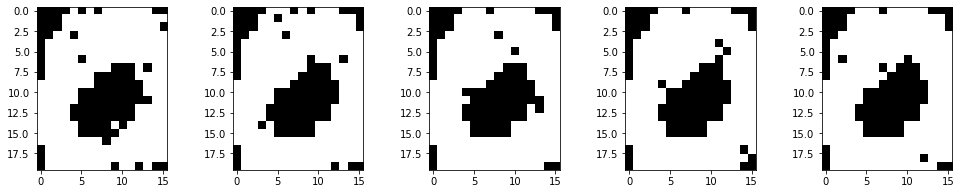

Layer pretrain epoch : 15:   1%|▌                                                    | 10/1000 [00:00<00:10, 92.88it/s]

3


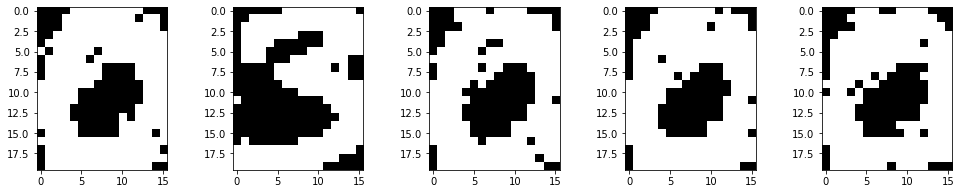

Layer pretrain epoch : 9:   1%|▎                                                      | 6/1000 [00:00<00:19, 51.42it/s]

4


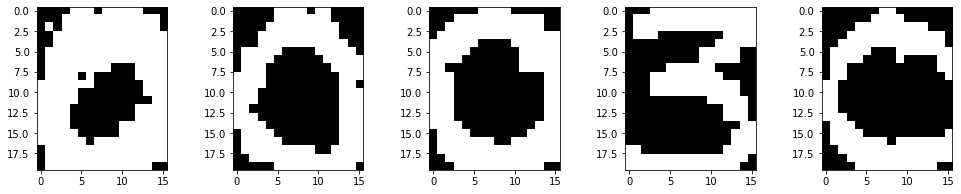

Layer pretrain epoch : 10:   1%|▍                                                     | 7/1000 [00:00<00:16, 60.01it/s]

5


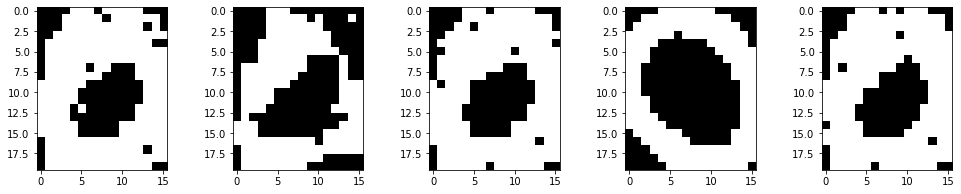

Layer pretrain epoch : 9:   1%|▎                                                      | 6/1000 [00:00<00:20, 48.71it/s]

6


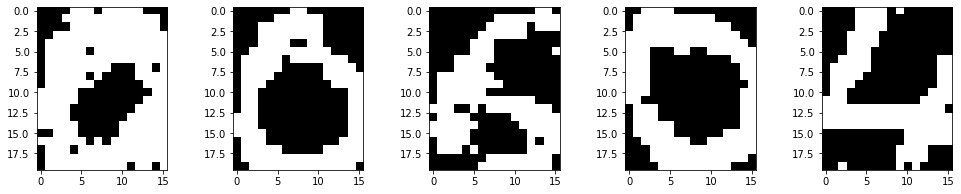

Layer pretrain epoch : 8:   0%|▎                                                      | 5/1000 [00:00<00:22, 44.69it/s]

7


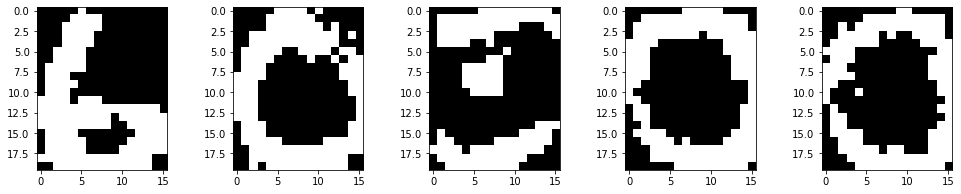

Layer pretrain epoch : 7:   0%|▏                                                      | 4/1000 [00:00<00:26, 37.85it/s]

8


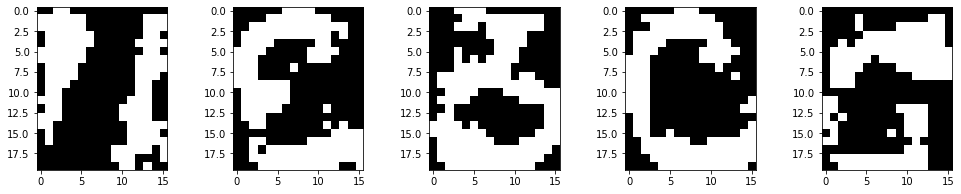

Layer pretrain epoch : 6:   0%|▏                                                      | 4/1000 [00:00<00:29, 33.70it/s]

9


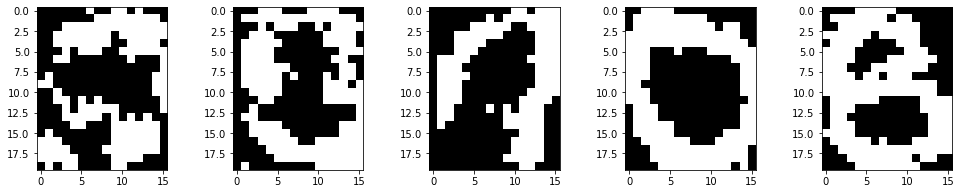

In [32]:
for number in range(10):
    reduced_dataset = alpha(up_to=number, letter=False)
    print(number)
    rbm = RBM(reduced_dataset.shape[1], 200)
    errors = rbm.train(reduced_dataset, 32, num_epochs=1000, lr=0.1, verbose=False)
    gen_and_plot(rbm, (20, 16))

# MNIST

In [4]:
from codes.utils import load_mnist

train = load_mnist()

img = train[0][0]
label = train[1][0]

img = [img[i].flatten().reshape(1,-1) for i in range(img.shape[0])]
img = np.concatenate(img)
img.shape

def mnist(number):
    numbers = train[0][0][train[1][0]<number+1]
    numbers = [numbers[i].flatten() for i in range(numbers.shape[0])]
    numbers = np.array(numbers)
    return numbers

Up to : 0
Epoch 10 Complete: Reconstruction Error: 7.1898642
Epoch 20 Complete: Reconstruction Error: 6.5835714
Epoch 30 Complete: Reconstruction Error: 6.1870023
Epoch 40 Complete: Reconstruction Error: 5.8764333
Epoch 50 Complete: Reconstruction Error: 5.6700372
Epoch 60 Complete: Reconstruction Error: 5.5214966
Epoch 70 Complete: Reconstruction Error: 5.3705301
Epoch 80 Complete: Reconstruction Error: 5.2504485
Epoch 90 Complete: Reconstruction Error: 5.1504342
Epoch 100 Complete: Reconstruction Error: 5.0616672


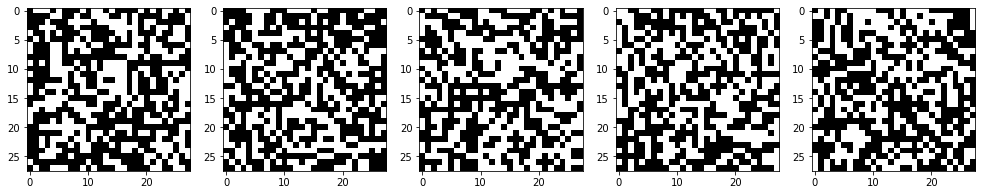

Up to : 1
Epoch 10 Complete: Reconstruction Error: 5.6328075
Epoch 20 Complete: Reconstruction Error: 5.0181291
Epoch 30 Complete: Reconstruction Error: 4.6938188
Epoch 40 Complete: Reconstruction Error: 4.4824570
Epoch 50 Complete: Reconstruction Error: 4.3177307
Epoch 60 Complete: Reconstruction Error: 4.1964700
Epoch 70 Complete: Reconstruction Error: 4.0812182
Epoch 80 Complete: Reconstruction Error: 4.0034070
Epoch 90 Complete: Reconstruction Error: 3.9189040
Epoch 100 Complete: Reconstruction Error: 3.8486121


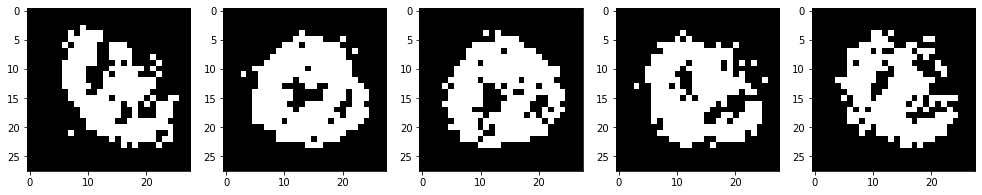

In [5]:
for number in range(2):
    print('Up to :',number)
    reduced_dataset = mnist(number)
    rbm = RBM(reduced_dataset.shape[1], 350)
    errors = rbm.train(reduced_dataset, 128, num_epochs=100, lr=0.1)
    gen_and_plot(rbm, (28, 28))